# Summer Olympics Data Analysis Assignment

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. In how many cities Summer Olympics is held so far?

In [2]:
df=pd.read_csv("Summer.csv")
num=len(df['City'].unique())
print("The Olympics have been conducted in " + str(num) + " cities")

The Olympics have been conducted in 22 cities


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

#### Method-1

In [4]:
df.filter(items=["Sport","Medal"]).query('Medal=="Gold"').groupby('Sport').size().sort_values(ascending=False).head()

Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
dtype: int64

#### Method-2

In [7]:
d=dict()
for i in df['Sport'].unique():
  d[i]=len(df.loc[(df['Sport']==i) & (df['Medal']=='Gold')])
d=sorted(d.items(), key=lambda item: item[1])
d.reverse()
data=pd.DataFrame(d,columns=['Sport','Gold Medals'])
data.head()

,Sport,Gold Medals
0,Aquatics,1421
1,Athletics,1215
2,Rowing,890
3,Gymnastics,820
4,Fencing,552


#### Plotting graph

Text(0.5, 1.0, 'TOP 5 Sports Having Most Number of Gold Medals')

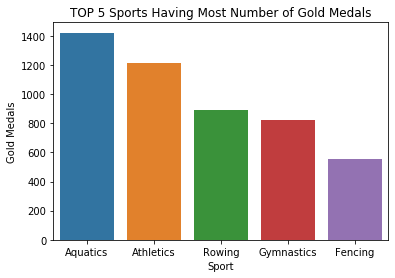

In [9]:
sns.barplot(x=data['Sport'][:5],y=data['Gold Medals'][:5]).set_title("TOP 5 Sports Having Most Number of Gold Medals")

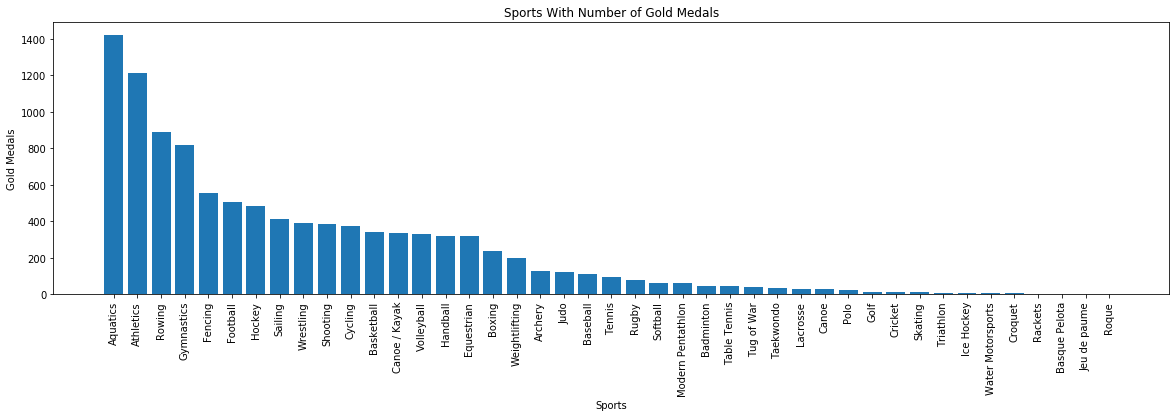

In [10]:
fig = plt.figure(figsize=(20, 5))
plt.bar(data['Sport'],data['Gold Medals'])
plt.xlabel("Sports")
plt.xticks(rotation=90)
plt.ylabel("Gold Medals")
plt.title("Sports With Number of Gold Medals")
plt.show()

### 3. Which sport is having most number of medals so far? (Top 5)

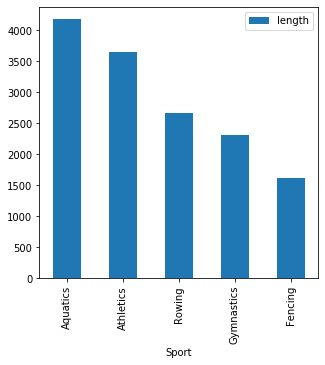

In [2]:
data = []
for sport in df['Sport'].unique():
    length=len(df[df['Sport']  == sport])
    data.append([sport , length])

pd.DataFrame(data,columns = ['Sport','length']).sort_values(by='length', ascending = False).head().plot(x = 'Sport', y = 'length', kind = 'bar', figsize = (5,5))

### 4. Which player has won most number of medals? (Top 5)

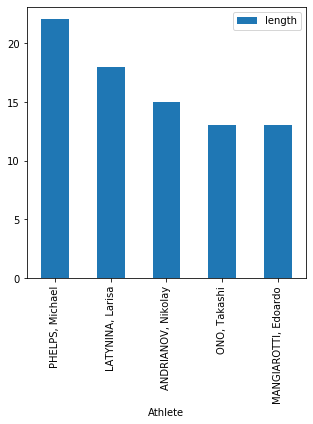

In [8]:
data = []

for athlete in df['Athlete'].unique():
    length=len(df[df['Athlete']  == athlete])
    data.append([athlete ,length])
pd.DataFrame(data,columns = ['Athlete','length']).sort_values(by='length', ascending = False).head().plot(x = 'Athlete', y = 'length', kind = 'bar', figsize = (5,5))

### 5. Which player has won most number Gold Medals of medals? (Top 5)

#### Method-1

In [11]:
df.filter(items=["Athlete","Medal"]).query('Medal=="Gold"').groupby('Athlete').size().sort_values(ascending=False).head()

Athlete
PHELPS, Michael     18
NURMI, Paavo         9
SPITZ, Mark          9
LEWIS, Carl          9
LATYNINA, Larisa     9
dtype: int64

#### Method-2

In [13]:
d=dict()
for i in df['Athlete'].unique():
    d[i]=len(df.loc[(df['Athlete']==i) & (df['Medal']=='Gold')])
d=sorted(d.items(), key=lambda item: item[1])
d.reverse()
data=pd.DataFrame(d,columns=['Athlete','Gold Medals'])
data.head()

,Athlete,Gold Medals
0,"PHELPS, Michael",18
1,"LEWIS, Carl",9
2,"SPITZ, Mark",9
3,"LATYNINA, Larisa",9
4,"NURMI, Paavo",9


#### Plotting graph

Text(0.5, 1.0, 'TOP 5 Players Having Most Number of Gold Medals')

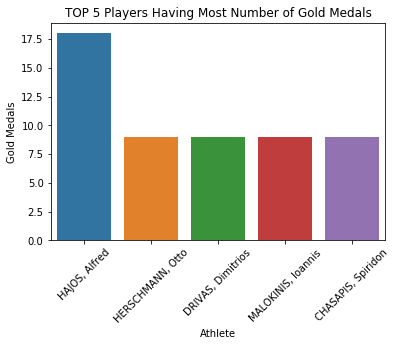

In [14]:
graph=sns.barplot(x=df['Athlete'][:5],y=data['Gold Medals'][:5])
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
graph.set_title("TOP 5 Players Having Most Number of Gold Medals")

### 6. In which year India won first Gold Medal in Summer Olympics?

#### Method-1

In [16]:
df.filter(items=["Country","Medal",'Year']).query('Medal=="Gold"').query('Country=="IND"').groupby('Year').size().head(1)

Year
1928    15
dtype: int64

#### Method-2

In [18]:
m=9999999
for i in range(len(df['Medal'])):
    if(df['Country'][i]=='IND' and df['Medal'][i]=='Gold'):
        if(df['Year'][i]<m):
            m=df['Year'][i]
print("Year in which India won its first Gold Medal :- ",m)

Year in which India won its first Gold Medal :-  1928


### 7. Which event is most popular in terms on number of players? (Top 5)

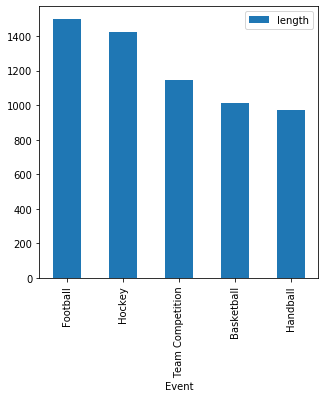

In [12]:
data = []

for event in df['Event'].unique():
    length=len(df[df['Event']  == event])
    data.append([event ,length])
pd.DataFrame(data,columns = ['Event','length']).sort_values(by='length', ascending = False).head().plot(x = 'Event', y = 'length', kind = 'bar', figsize = (5,5))

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [21]:
data=df.filter(items=["Sport","Medal","Gender"]).query('Gender=="Women"').query('Medal=="Gold"').groupby('Sport').size().sort_values(ascending=False).head()
print(data)

Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
dtype: int64


#### Plotting graph

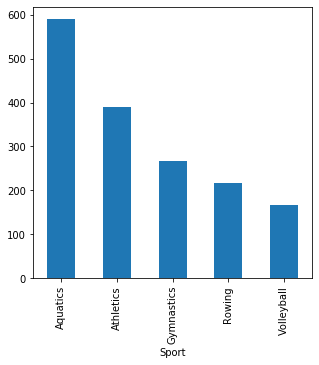

In [22]:
data.plot(x = 'Sport', kind = 'bar', figsize = (5,5))